# <ins>RECHERCHE DU MEILLEUR MODELE D'APPRENTISSAGE</ins>

## <ins>BUT DU NOTEBOOK </ins>

#### Nous avons pu établir que le modèle le plus adapté est le modèle RandomForest. Nous allons ainsi déterminé les meilleurs paramètres puis procéder à l'entrainement:

## <ins>IMPORT DES LIBRAIRIES ET DU DATASET</ins>

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, StratifiedKFold

from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import f1_score, classification_report
from imblearn.metrics import classification_report_imbalanced, geometric_mean_score

import pickle
import joblib
from joblib import dump, load

import projet_rakuten

In [10]:
from common_projet_rakuten_antoine import pre_processing_texte

X_train_filepath = './X_train_update.csv'

y_train_filepath = './Y_train_CVw08PX.csv'

df = pre_processing_texte(X_train_filepath, y_train_filepath)

Début du préprocessing à 21:43:01
Nous chargeons les dataframes et récupérons les liens des mimages correspondantes afin de créer un dataframe preprocessé
Shape de notre dataframe avant préprocessing : (84916, 4)
Après avoir concaténé la colonne designation et description, nous avons constaté la présence de 1414 doublons. Ils sont supprimés !
Il y a 31 langues détectées au sein du datastet
Nous conservons le français et l'anglais


/mnt/d/FIL_ROUGE_RAKUTEN/projet_rakuten.py:62: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  mots = BeautifulSoup(mots, 'html.parser').get_text()


Preprocessing terminé 21:48:40. Durée totale: 0:05:38.839861.
Shape de notre dataframe après preprocessing : (76135, 3)


In [15]:
df.head()

,prdtypecode,filepath,produit_clean
1,2280,./images/train/image_1008141237_product_436067...,journal art 2001 art marche salon art asiatiqu...
2,50,./images/train/image_938777978_product_2011151...,grand stylet ergonomique bleu gamepad nintendo...
4,2705,./images/train/image_1077757786_product_278535...,guerre tuques luc idées grandeur veut organise...
5,2280,./images/train/image_393356830_product_5862738...,afrique contemporaine hiver 2004 dossier japon...
7,2522,./images/train/image_999581347_product_3442400...,conquérant sept cahier couverture polypro page...


## <ins>SPLIT ET TOKENISATION</ins>

In [4]:
# PARTAGE DE NOTRE DATASET EN 2 DATASET TRAIN ET VALIDATION

features = df['produit_clean']
target = df['prdtypecode']

# Ayant un désequilibre de classe, nous ajoutons l'argument stratify
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.15, random_state=123, stratify = target)

display('Shape X_train : ', X_train.shape)
display('Shape X_test : ', X_test.shape)

'Shape X_train : '

(64716,)

'Shape X_test : '

(11421,)

In [5]:
# Nous nous limitons aux 1000 mots les plus utilisés
vectorizer = CountVectorizer(max_features = 1000)

X_train = vectorizer.fit_transform(X_train).todense() # todense permet de supprimer les valeurs nulles pour véiter les matrices creuses

X_test = vectorizer.transform(X_test).todense()

In [6]:
print(vectorizer.vocabulary_)

{'place': 697, 'maison': 529, 'coussin': 239, 'case': 154, 'canapé': 142, 'taille': 883, 'caractéristiques': 147, 'couverture': 242, 'tout': 913, 'neuf': 608, 'haute': 426, 'qualité': 766, 'matériel': 549, 'coton': 226, 'lin': 496, 'couleur': 232, 'retour': 791, 'rose': 797, 'type': 933, 'impression': 445, 'simple': 827, 'face': 347, 'forme': 394, 'carré': 150, '45cm': 4, 'taie': 882, 'oreiller': 637, 'plaît': 707, 'permettre': 678, 'légère': 521, 'déviation': 311, 'mesure': 557, 'comprendre': 203, 'merci': 556, 'forfait': 392, 'comprend': 202, 'avion': 81, 'mini': 568, 'control': 217, 'micro': 564, 'deux': 265, 'version': 954, 'jaune': 467, 'plus': 711, 'forte': 396, 'cuisine': 250, 'plat': 704, 'également': 985, 'comme': 196, 'dji': 283, 'drone': 297, 'mavic': 550, 'filtres': 378, 'caméra': 141, 'étanche': 996, 'spécialement': 850, 'fpv': 397, 'eau': 313, 'efficace': 317, 'amp': 36, 'performance': 673, 'film': 375, 'revêtement': 792, 'poids': 715, 'léger': 520, 'conception': 206, 'co

## <ins>CHOIX DES MEILLEURS PARAMETRES AVEC GRIDSEARCHCV</ins>

In [15]:
grid_rf = RandomForestClassifier(n_jobs = -1, random_state=22)

# Configuration des hyperparamètres pour nos modèles

param_grid_rf = [{'n_estimators': [10, 50, 100, 250, 500, 1000], 'min_samples_leaf': [1, 3, 5], 'max_features': ['sqrt', 'log2']}]

clf = GridSearchCV(grid_rf, param_grid_rf)

clf.fit(X_train_array, y_train)

GridSearchCV(estimator=RandomForestClassifier(n_jobs=-1, random_state=22),
             param_grid=[{'max_features': ['sqrt', 'log2'],
                          'min_samples_leaf': [1, 3, 5],
                          'n_estimators': [10, 50, 100, 250, 500, 1000]}])

In [17]:
print(clf.best_estimator_)

RandomForestClassifier(max_features='log2', n_estimators=1000, n_jobs=-1,
                       random_state=22)


In [18]:
print(clf.best_score_)

0.7290093940788758


## <ins>ENTRAINEMENT RANDOMFORESTCLASSIFIER</ins>

In [9]:
rdf = RandomForestClassifier(max_features='log2', n_estimators=1000, n_jobs=-1, random_state=22)

# Transformation en np array pour notre modèke
X_train_array = np.asarray(X_train)

rdf.fit(X_train_array, y_train)

RandomForestClassifier(max_features='log2', n_estimators=1000, n_jobs=-1,
                       random_state=22)

In [10]:

import joblib

from joblib import dump

# Sauvegarde du modèle RandomForest dans un fichier
dump(rdf, './sauvegarde_modele/RandomForest/random_forest_model.joblib')


['./sauvegarde_modele/RandomForest/random_forest_model.joblib']

Début de la prédiction à 16:01:26
Fin de la récupération à 16:01:31
Délai du modèle pour la prédiction :  0:00:04.587002
ACCURACY DU MODELE :  0.7112336923211627

F1_SCORE_WEIGHTED :  0.717434562779993

              precision    recall  f1-score   support

          10       0.22      0.55      0.31       393
          40       0.61      0.50      0.55       311
          50       0.76      0.62      0.68       224
          60       0.91      0.81      0.86       117
        1140       0.64      0.60      0.62       309
        1160       0.76      0.59      0.66       430
        1180       0.43      0.20      0.27        96
        1280       0.62      0.56      0.59       676
        1281       0.57      0.48      0.52       290
        1300       0.78      0.85      0.82       685
        1301       0.76      0.68      0.72       100
        1302       0.88      0.61      0.72       340
        1320       0.75      0.64      0.69       432
        1560       0.77      0.81      0

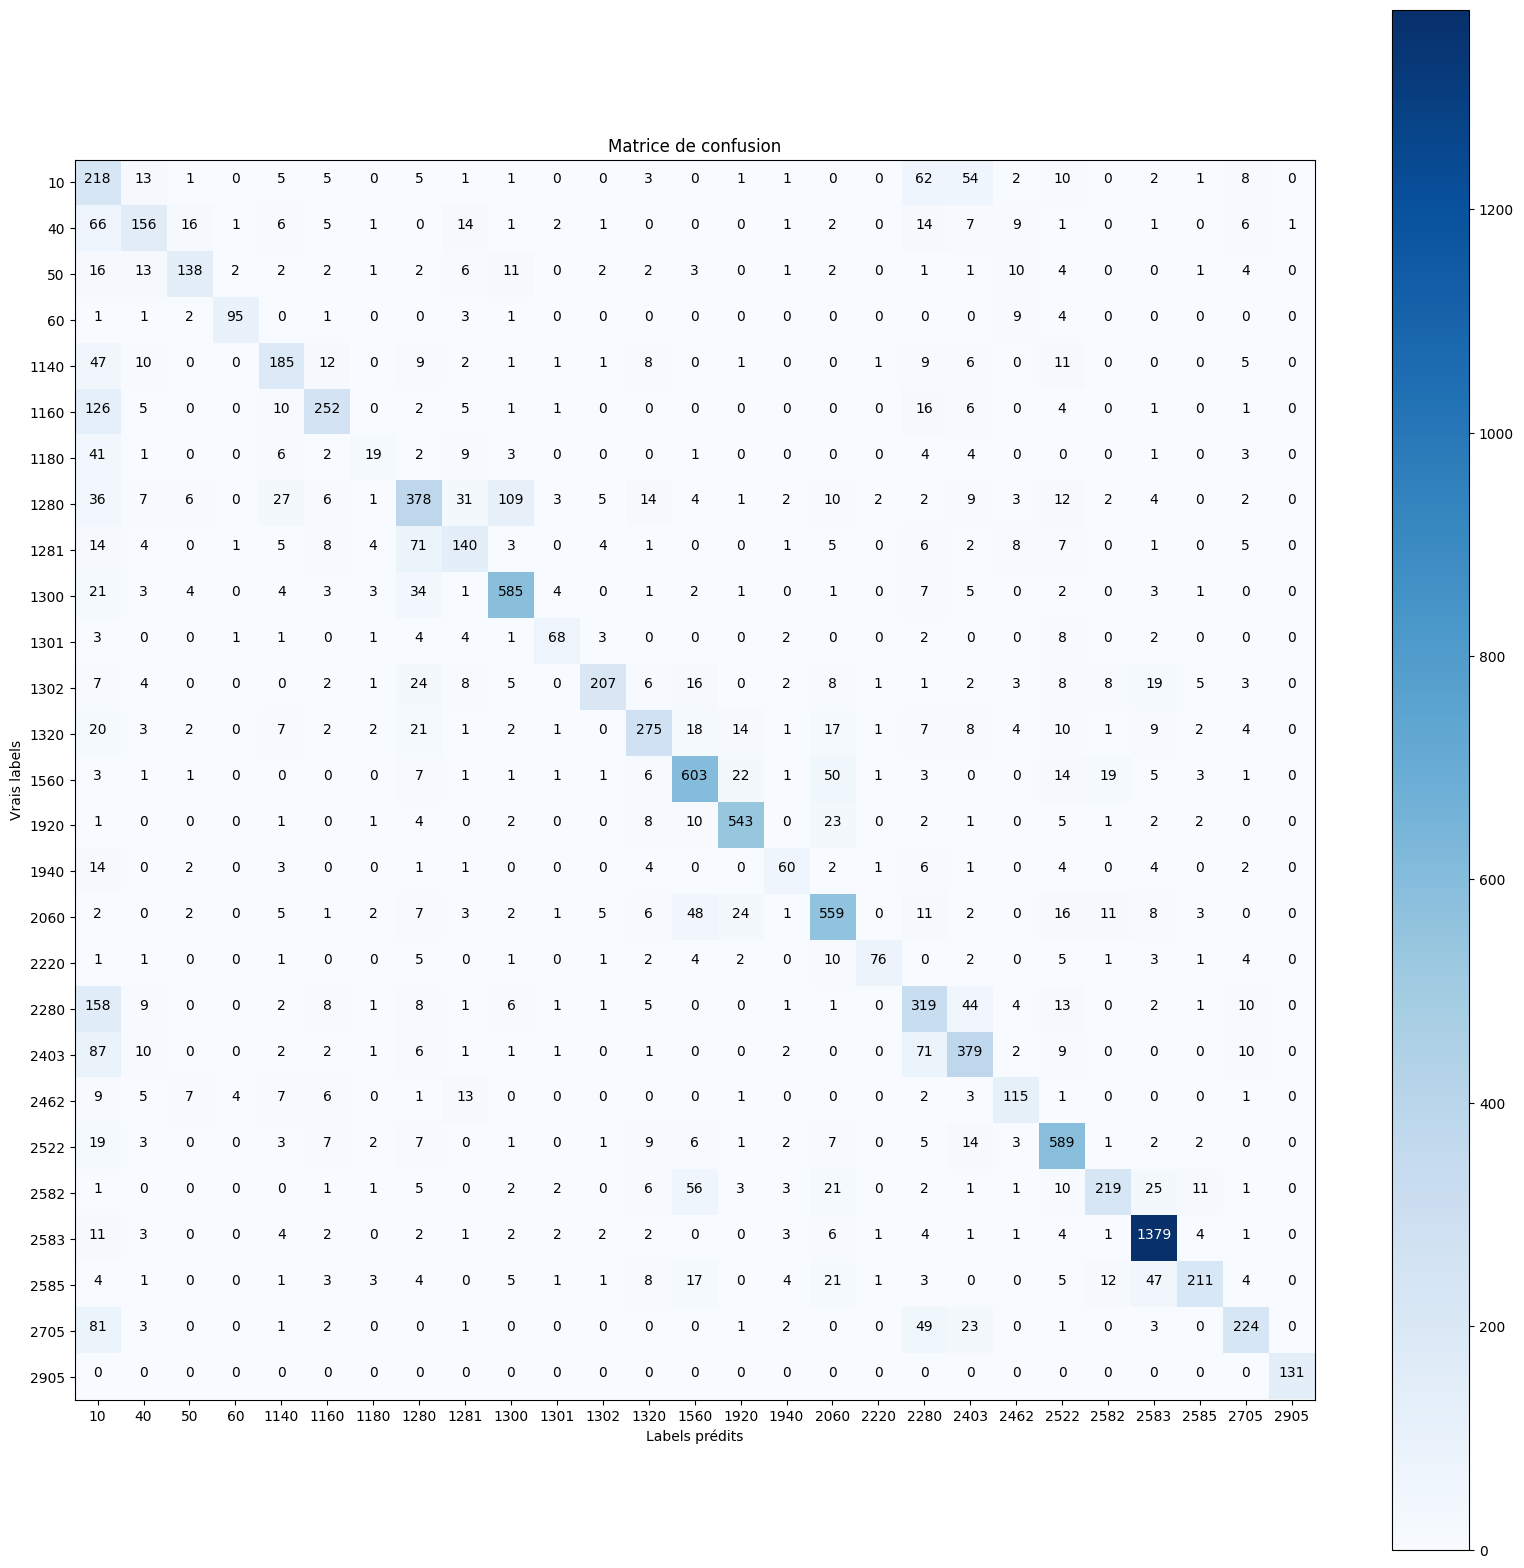



 Sauvegarde de notre modèle dans le répertoire ./sauvegarde_modele/RandomForest/


In [ ]:
from projet_rakuten import predict_randomforest

predict_randomforest(rdf, X_test, y_test)

### CHARGEMENT DU MODELE

In [ ]:
from joblib import load

# Chargement du modèle RandomForest depuis le fichier
rf_model = load("./sauvegarde_modele/RandomForest/random_forest_model.joblib")

In [ ]:
import numpy as np

def top_k_accuracy(y_true, y_prob, k=3):
    """Calcule le Top K Accuracy."""
    y_pred = np.argsort(-y_prob, axis=1)[:, :k]
    num_correct = ((y_pred == y_true[:, None]) & (range(k)[None, :] <= y_pred)).sum()
    return float(num_correct)/len(y_true)

# Obtenir les prévisions probables de toutes les observations
y_prob = rdf.predict_proba(X_test)

# Calculer le Top 3 Accuracy
top3_accuracy = top_k_accuracy(y_test, y_prob)